
# Project: Investigating the tmdb movies Dataset

## Introduction
### Data Description
>
> This dataset includes information, and eventual investigation, about the various tmdb movies released over the years
>
#### Questions(s) for Analysis
Given the dataset, it is required to draw insights from the this dataset. A few questions are asked; these questions serve as guide for the subsequent explorations. These questions include:
1. Which movies are the most popular of all time?
2. Which genres are the most popular of all time?
3. Which actors are the most popular?
4. How is revenue affected as the years go by?
5. Which movie title had the highest vote count?
6. Which movie title had the longest run time?
7. Which movie actors got the highest vote counts?
8. How is popularity trending over the period of time?

In [203]:
# Import the necessry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling 

### General Properties

In [207]:
# Load ther dataset
df = pd.read_csv('Dataset/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [209]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [205]:
# Checking the dimension of the dataset
print(df.shape)

(10730, 16)


In [210]:
# Checking for the datatype of the features

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning

In [211]:
# Checking for missing values
print(df.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [212]:
# Dropping some columns that are less important
df.drop(['homepage','tagline', 'keywords', 'production_companies'], axis=1, inplace=True)


In [213]:
df.drop('imdb_id', axis=1, inplace=True)

In [214]:
# Running Descriptive Statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [215]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [216]:
# Dropping missing values
df.dropna(axis=0, inplace=True)

In [217]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [218]:
#Checking for the new shape
df.shape

(10730, 16)

# Exploratory Data Analysis

In [219]:
df.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
popularity,32.985763,28.419936,13.112507,11.173104,9.335014
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
overview,Twenty-two years after the events of Jurassic ...,An apocalyptic story set in the furthest reach...,Beatrice Prior must confront her inner demons ...,Thirty years after defeating the Galactic Empi...,Deckard Shaw seeks revenge against Dominic Tor...
runtime,124,120,119,136,137
genres,Action|Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Thriller,Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Fantasy,Action|Crime|Thriller


### Which movies are the most popular of all time?

In [123]:
popular_movies = df.groupby('original_title').popularity.max().sort_values(ascending=False)
popular_movies.head(10)

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

### Which genres are the most popular of all time?

In [124]:
popular_genres = df.groupby('genres').popularity.max().sort_values(ascending=False)
popular_genres.head()

genres
Action|Adventure|Science Fiction|Thriller    32.985763
Adventure|Drama|Science Fiction              24.949134
Action|Science Fiction|Adventure             14.311205
Adventure|Science Fiction|Thriller           13.112507
Action|Adventure|Science Fiction             12.971027
Name: popularity, dtype: float64

### Most popular actors/cast of all time

In [125]:
popular_actors = df.groupby('cast').popularity.max().sort_values(ascending=False)
popular_actors.head(1)

cast
Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson    32.985763
Name: popularity, dtype: float64

The most popular actors of all time are:
1. Chris Pratt

2. Bryce  Dallas Howard

3. Irrfan Khan

4. Vincent D'Onofrio

5. Nick Robinson

### Movie title with the highest budget

In [126]:
#median_budget = df.budget.median()
#high_budget = df[df.budget > median_budget]

movie_with_highest_budget = df.groupby('original_title').budget.max()
movie_with_highest_budget.head(1)


original_title
$5 a Day    0
Name: budget, dtype: int64

### Observation
$5 a Day had the highest movie budget

### Which movie title had the highest vote count?

In [127]:
df.groupby('original_title').vote_count.max().sort_values(ascending=False).head()

original_title
Inception           9767
The Avengers        8903
Avatar              8458
The Dark Knight     8432
Django Unchained    7375
Name: vote_count, dtype: int64

### Observation
- Inception had the highest vote count

### Movie with the highest run time

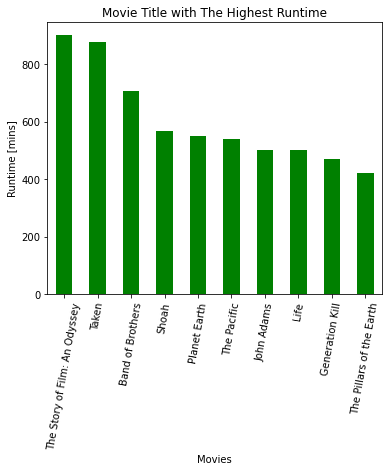

In [220]:
plt.figure(figsize=(6,5))
high_runtime = df.groupby('original_title').runtime.max().sort_values(ascending=False).head(10)

high_runtime.plot(kind='bar', xlabel='Movies', ylabel='Runtime [mins]', title='Movie Title with The Highest Runtime', color='green')
plt.xticks(rotation=80);

### Observation
- The Story of Film: An Odyssey ha the longest run time

### Popular movies with the highest budget

In [129]:
#popular_movies = df.groupby('original_title').popularity.max().sort_values(ascending=False)
#popular_movies.head()
popular_movies = df.nlargest(20, 'popularity')
popular_movies.reset_index(drop=True).head(2)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [130]:
pop_movies_high_budget = popular_movies.nlargest(10, 'budget')
pop_movies_high_budget['original_title']

634     The Hobbit: The Battle of the Five Armies
1386                                       Avatar
3                    Star Wars: The Force Awakens
4                                       Furious 7
2875                              The Dark Knight
630                       Guardians of the Galaxy
631           Captain America: The Winter Soldier
629                                  Interstellar
635                                    Big Hero 6
1919                                    Inception
Name: original_title, dtype: object

### Observation
The top 5 popular movies with highest are:
1. The Hobbit: The Battle of the Five Armies
2. Avatar
3. Star Wars: The Force Awakens
4. Furious 7
5. The Dark Knight

In [131]:
# Movie actors with highest vote count
actors_with_high_vcounts = df.groupby('cast').vote_count.max().sort_values(ascending=False).head()
actors_with_high_vcounts

cast
Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen Page|Tom Hardy|Ken Watanabe           9767
Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chris Hemsworth|Scarlett Johansson      8903
Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez       8458
Christian Bale|Michael Caine|Heath Ledger|Aaron Eckhart|Gary Oldman                8432
Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|Kerry Washington|Samuel L. Jackson    7375
Name: vote_count, dtype: int64

### Observation
The top 5 movie actors with the highest vote counts are:
1. Leonardo DiCaprio
2. Joseph Gordon-Levitt
3. Ellen Page
4. Tom Hardy
5. Ken wa

### How is popularity trending over the period of time?

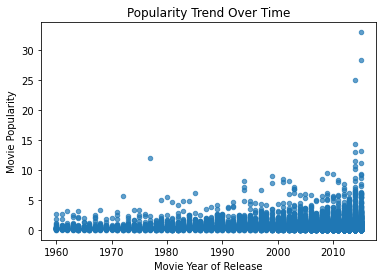

In [154]:
%matplotlib inline
df.plot(x='release_year', y='popularity', kind='scatter', alpha=0.7, title='Popularity Trend Over Time');
plt.xlabel('Movie Year of Release')
plt.ylabel('Movie Popularity');

### Observation
There is no noticeable trend of popularity over period of time

Text(0, 0.5, 'Revenue Generated')

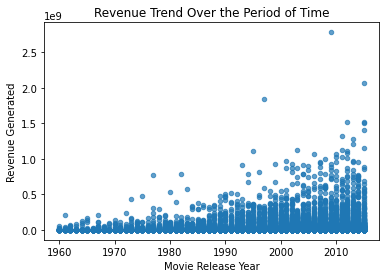

In [151]:
# Revenue Trend over the period of time

df.plot(x='release_year', y='revenue',  kind='scatter', title='Revenue Trend Over the Period of Time', alpha=.7);
plt.xlabel('Movie Release Year')
plt.ylabel('Revenue Generated')

### Observation
The Revenue increased over the years

### How does the movie runtime trends over time?

<AxesSubplot:xlabel='Movie Release Year', ylabel='Movie Runtime'>

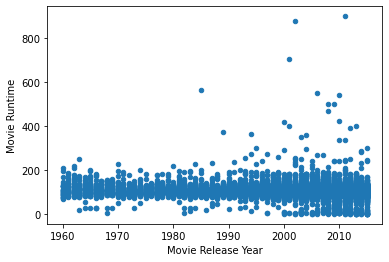

In [155]:
%matplotlib inline
df.plot(x='release_year', y='runtime', kind='scatter', xlabel='Movie Release Year', ylabel='Movie Runtime')


### Observation
 There is decrease in movies runtime over the years

### Do top rated movies always generate big revenue?

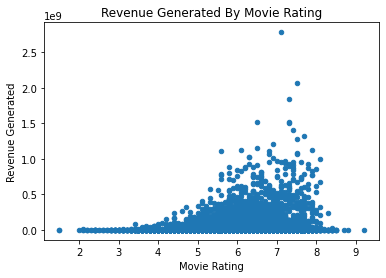

In [196]:
df.plot(x='vote_average', y='revenue', kind='scatter', title='Revenue Generated By Movie Rating', xlabel='Movie Rating', ylabel='Revenue Generated');

### Observation
Top Rated movies always generate big revenues

### Is there any impact of vote count on revenue?

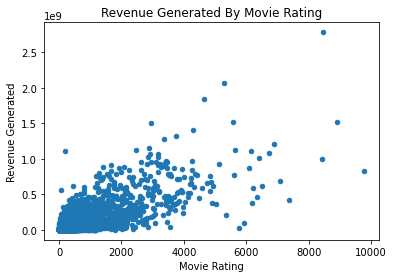

In [180]:
df.plot(x='vote_count', y='revenue', kind='scatter', title='Revenue Generated By Movie Rating', xlabel='Movie Rating', ylabel='Revenue Generated');

### Observation
Vote count impacts revenue positively

### Can we provide a list of most popular directors based on ratings?

In [198]:
high_pop = df.nlargest(10, 'vote_average')
high_pop.head(2)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900,Documentary,9/3/11,14,9.2,2011,0.0,0.0
1200,374430,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,12/16/14,41,8.8,2014,0.0,0.0


In [200]:
pop_directors = high_pop.director
pop_directors

3894                            Mark Cousins
1200                           Carl Tibbetts
6911                            David Mallet
3690                             Curt Morgan
8221    Martin Scorsese|Michael Henry Wilson
8411                            Saul Swimmer
8839                             Stan Lathan
609                           Andrew Jarecki
2334                  Sam Dunn|Scot McFadyen
4178                          Frank Darabont
Name: director, dtype: object

**The most popular directors are:**
1. Mark Cousins
2. Carl Tibbetts
3. David Mallet
4. Martin Scorsese
5. Michael Henry Wilson

### Can we provide a list of directors that generates big revenue?

In [195]:
big_rev = df.nlargest(10, 'revenue')
big_rev.director

1386              James Cameron
3                   J.J. Abrams
5231              James Cameron
4361                Joss Whedon
0               Colin Trevorrow
4                     James Wan
14                  Joss Whedon
3374                David Yates
5422    Chris Buck|Jennifer Lee
5425                Shane Black
Name: director, dtype: object

**The Directors that generate big revenues are:**
- James Cameron
- J.J. Abrams
- Joss Whedon
- Colin Trevorrow
- James Wan

### Is there a relation between popularity and revenue for directors? 

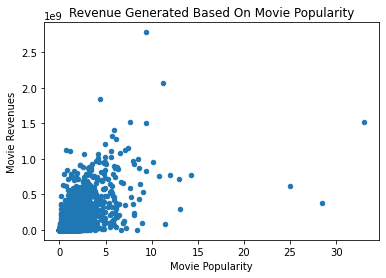

In [202]:
df.plot(x='popularity', y='revenue', kind='scatter', title='Revenue Generated Based On Movie Popularity', xlabel='Movie Popularity', ylabel='Movie Revenues');

### Observation
- Popular movies result to big revenues

# Conclusion

After thorough cleaning of the movies dataset, Exploratory Data Analysis was performed on the dataset in order to draw insights from the dataset.
The key findings from the exoplorations are:
- Jurassic World was the most popular  movie of all time
- Action,Adventure,Science Fiction and Thriller were the most   popular genres of all time.
- Chris Pratt was the most popular actor
- $5 a Day had the highest budget
- The Story of Film: An Odyssey ha the longest run time had the highest movie runtime
- The Hobbit: The Battle of the Five Armies was the most movie  with highest budget
- Inception had the highest vote count
- Movie revenues increased as the years went by.
- Mark Cousins was the most popular director
- James Cameron generated tyhe biggest revenue amongst the directors.

## Limitation(s)

1. The statistics employed here are descriptive and not inferential statistics, so no hypotheses and inferences were created with the dataset